In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from  matplotlib.colors import ListedColormap

In [2]:
df=pd.read_csv("DS2_C5_S4_Wine_Data_Practice.data",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df=df.rename(columns={0:'Target',1:'Alcohol',2:'Malic Acid',3:'Ash',4:'Alcalinity of ash',5:'Magnesium',6:'Total phenols',7:'Flavanoids',8:'Nonflavanoid phenols',9:'Proanthocyanins',10:'Color Intensity',11:'Hue',12:'OD280/OD315 of diluted vines',13:'Proline'})
df

,Target,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted vines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.columns

Index(['Target', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue',
       'OD280/OD315 of diluted vines', 'Proline'],
      dtype='object')

# Task 1: Data Exploration and Visualization.

# 1.Identify the shape and structure of the given dataset.

In [5]:
df.shape

(178, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target                        178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted vines  178 non-null    float64
 13  Proli

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


# 2.Identify the wines classes which nick wishes to discrminate.

In [8]:
df.nunique()

Target                            3
Alcohol                         126
Malic Acid                      133
Ash                              79
Alcalinity of ash                63
Magnesium                        53
Total phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color Intensity                 132
Hue                              78
OD280/OD315 of diluted vines    122
Proline                         121
dtype: int64

# 3.Create a histogram for each input. are all inputs normally distributed.

In [10]:
num=[]
cat=[]
for i in df.columns:
    if df[i].nunique()<10:
        cat.append(i)
    else:
        num.append(i)

In [13]:
cat

['Target']

In [14]:
num

['Alcohol',
 'Malic Acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color Intensity',
 'Hue',
 'OD280/OD315 of diluted vines',
 'Proline']

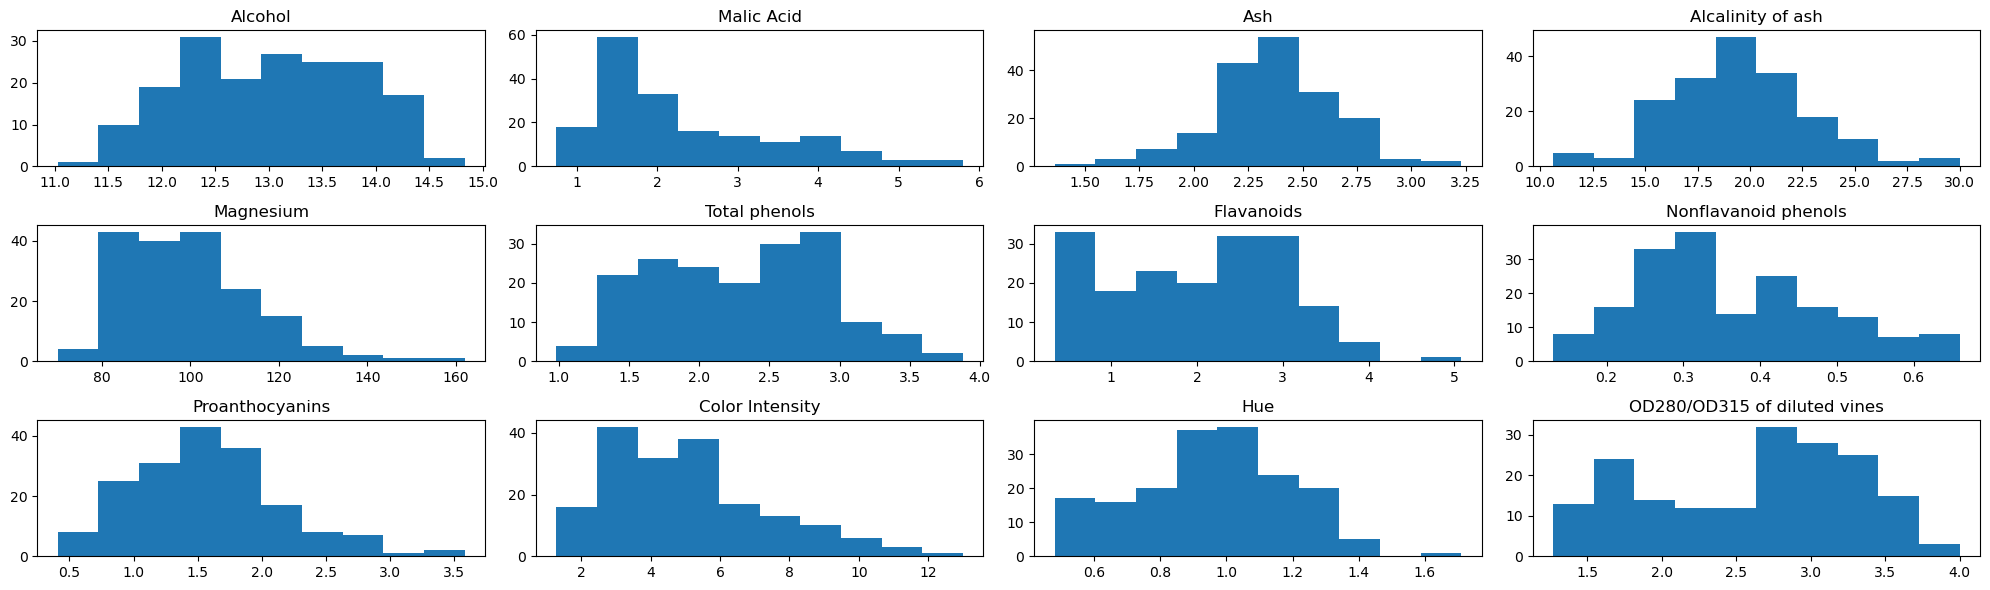

In [53]:
numeric_cols=num
num_col=4
bins=60
num_rows=int(len(numeric_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,6))
for col,ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(df[col])
    ax.set_title(col)

conclusion:-Ash,Alcalinity of ash,Proanthocyanins there are normally distributed.

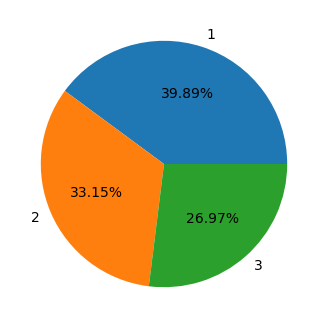

In [16]:
plt.figure(figsize=(10,4))
a=df['Target'].value_counts()
b=df['Target'].unique()
plt.pie(a,labels=b,autopct='%.2f%%');



# Task 2: Data Preprocessing

# 1.Identify missing values if any exists.

In [10]:
df.isnull().sum()

Target                          0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of diluted vines    0
Proline                         0
dtype: int64

# 2.Normalize the features to zero mean and standard deviation 1 using sklearn StandardScaler.

In [51]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale_df=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
scale_df

,Target,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted vines,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# 3.Check correlation among variables.

In [52]:
df.corr()

,Target,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted vines,Proline
Target,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


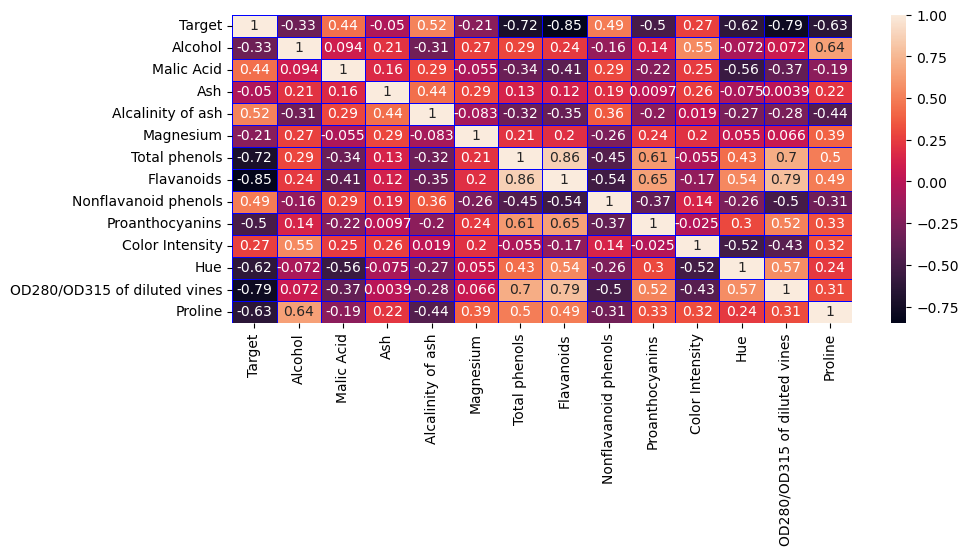

In [53]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='b',linewidth=.5);

# 4.Create a train_test_split with 20% test data using sklearn train_test_split routine, with random seed=42.

In [30]:
x=df[['Alcohol','Malic Acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted vines','Proline']]
y=df[['Target']]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

# Task 3 Modelling-Naive Bayes.

# 1.Use the sklearn Gaussian Naive Bayes classifer.

In [32]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
model.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.971830985915493

In [33]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

# 2.Obtain the prediction probablities on the test data and create a histogram with the probabilites of the chosen class.

In [65]:
pred_prob=model.predict_proba(x_test)
pred_prob

array([[9.99991820e-01, 8.17986629e-06, 1.75844851e-31],
       [9.99999053e-01, 9.46598997e-07, 1.78086968e-25],
       [1.13448660e-18, 1.99953560e-03, 9.98000464e-01],
       [9.99999999e-01, 7.71694277e-10, 4.13905530e-37],
       [4.85016095e-07, 9.99999515e-01, 1.99877483e-22],
       [1.00000000e+00, 2.47066704e-12, 1.42452382e-33],
       [7.95594246e-11, 1.00000000e+00, 6.55702700e-13],
       [3.15918793e-21, 4.37517039e-12, 1.00000000e+00],
       [1.94710799e-04, 9.99805289e-01, 5.67647705e-29],
       [2.42169478e-15, 5.33549614e-04, 9.99466450e-01],
       [9.93827013e-01, 6.17298732e-03, 1.83781764e-32],
       [1.37658180e-18, 3.84803880e-12, 1.00000000e+00],
       [9.86542823e-01, 1.34571766e-02, 3.14047577e-20],
       [7.68155801e-16, 9.82464750e-01, 1.75352499e-02],
       [1.00000000e+00, 2.78016158e-13, 4.69430467e-35],
       [1.25924089e-07, 9.99999874e-01, 2.81153369e-15],
       [4.42564516e-11, 1.00000000e+00, 4.05508262e-12],
       [2.99568596e-12, 1.00000

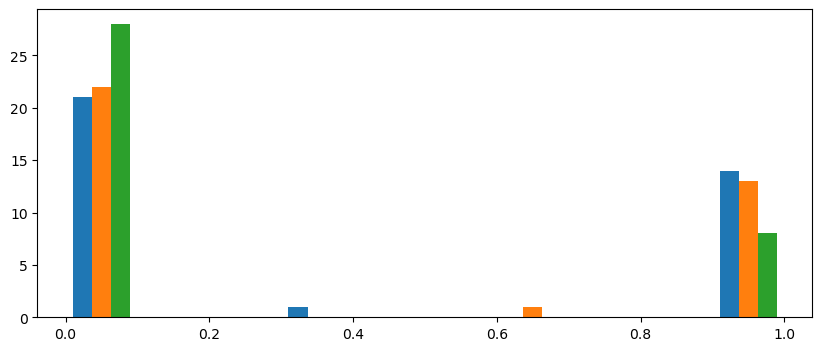

In [67]:
plt.figure(figsize=(10,4))
plt.hist(pred_prob);

# 3.Calculate the accuracy of the model on training dataset.

In [61]:
Y_train=model.predict(x_train)
Y_train

array([3, 3, 2, 3, 1, 2, 2, 2, 3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1,
       2, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1, 1, 2, 3, 2, 1, 3, 2, 1, 3, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3, 1, 2, 3, 3, 3,
       2, 1, 2, 3, 3, 2, 3, 2, 2, 2, 1, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 3, 2,
       1, 2, 1, 3, 1, 1, 2, 1, 1, 3, 2, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 3, 1, 2, 2, 1, 2, 2], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,Y_train))

0.971830985915493


# 3.Calculate the accuracy of the model on test dataset.

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


# Task 4 Modelling-Decision Tree.

# 1.Apply the Decision Tree algorithm to train the data.

In [45]:
X=df[['Alcohol','Malic Acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted vines','Proline']]
Y=df[['Target']]

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,Y_train)
model1.score(X_train,Y_train)

1.0

# 2.Predict the outcomes of the test data.

In [38]:
y_pred1=model1.predict(X_test)
y_pred1

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1], dtype=int64)

# 3.Calculate the accuracy of the training dataset.

In [49]:
from sklearn.metrics import accuracy_score
print('Accuracy_score',accuracy_score(y1_train,Y_train))

Accuracy_score 0.971830985915493


# 3.Calculate the accuracy of the test dataset

In [50]:
from sklearn.metrics import accuracy_score
print('Accuracy_score',accuracy_score(y_pred1,Y_test))

Accuracy_score 0.9444444444444444


# Task 5: Choose Best Model.

# 1.Evalute other performance metrics for the previous two classifer models.

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,recall_score,f1_score,precision_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,recall_score,f1_score,precision_score
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



# 2.Compare them and choose the best model for Nick to clasify future produced wine samples.